In [3]:
COLOR_SCHEME = {
    "Text1": "#211a46",
    "Purple": "#756591ff",
    "Yellow": "#f4aa0eff",
    "Green": "#45bea5ff",
    "Blue": "#0c467cff",
    "Pink": "#f5a296ff",
    "Red": "#f46b5cff",
    "Brown": "#c15c41ff",
    "Beige": "#faefd9",
}
 

In [4]:
import pandas as pd
pd.options.mode.copy_on_write = True

data_a = pd.read_csv('./a.csv')

In [5]:
data_a.head()

,No.,Category,Link to campaign,Campaign Target ($),Period of Assistance,Months,Amount raised ($),% raised,Amount disbursed ($),Year
0,1,Ex-Offenders,https://rayofhope.sg/product/give-the-33-year-...,900,Jan - Mar 19 (3 months),3.0,786,0.87,786,2019
1,2,Ex-Offenders,https://rayofhope.sg/product/give-the-33-year-...,400,April - May (2 months),2.0,200,0.50,200,2019
2,3,Ex-Offenders,Harry,680,April - May (2 months),2.0,52,0.08,52,2019
3,4,Ex-Offenders,Haran,512,April - July (4 months),4.0,256,0.50,256,2019
4,5,Ex-Offenders,https://rayofhope.sg/product/help-mr-manial-wi...,645,April - June (3 months),3.0,645,1.00,645,2019


In [6]:
desired_columns = ['Category', 'Campaign Target ($)', 'Amount raised ($)', '% raised', 'Amount disbursed ($)', 'Year']
df = data_a[desired_columns]
print(df.head())

       Category Campaign Target ($) Amount raised ($)  % raised  \
0  Ex-Offenders                 900               786      0.87   
1  Ex-Offenders                 400               200      0.50   
2  Ex-Offenders                 680                52      0.08   
3  Ex-Offenders                 512               256      0.50   
4  Ex-Offenders                 645               645      1.00   

  Amount disbursed ($)  Year  
0                  786  2019  
1                  200  2019  
2                   52  2019  
3                  256  2019  
4                  645  2019  


In [7]:
import matplotlib.pyplot as plt

In [8]:
# Remove rows with empty values in the "Campaign Target ($)" column
df = df.dropna(subset=['Campaign Target ($)'])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Replace empty values in "Amount raised ($)" and "Amount disbursed ($)" columns with 0
df['Amount raised ($)'].fillna(0, inplace=True)
df['Amount disbursed ($)'].fillna(0, inplace=True)

df['Campaign Target ($)'] = df['Amount raised ($)'].str.replace(',','').astype(float)
df['Amount disbursed ($)'] = df['Amount raised ($)'].str.replace(',','').astype(float)
df['Amount raised ($)'] = df['Amount raised ($)'].str.replace(',','').astype(float)
# Clean and standardize the "Category" column


# Define mapping for variations of category names to standardized version
category_mapping = {
    'Ex-offenders': 'Ex-Offenders',
    'Low-income (Families)': 'Low-Income (Families)',
    'Low-income Families': 'Low-Income (Families)',
    'Low-income Family': 'Low-Income (Families)',
    'Low-income families': 'Low-Income (Families)',
    'Low-income (Single Parents)': 'Low-Income (Single Parent)',
    'Low-income (Single parent)': 'Low-Income (Single Parent)',
    'Low-income (single parent)': 'Low-Income (Single Parent)',
    'Migrant worker': 'Migrant Workers',

}

df['Category'] = df['Category'].replace(category_mapping)

df['% raised'] = df['% raised'].multiply(100)


print(df['Amount raised ($)'].describe())




count       669.000000
mean       2728.039133
std        5052.855327
min          50.000000
25%        1180.000000
50%        2000.000000
75%        3000.000000
max      105595.870000
Name: Amount raised ($), dtype: float64


/var/folders/5s/j2ns7w_90xd4chty5twn4x400000gn/T/ipykernel_24504/362567596.py:8: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
When using the Copy-on-Write mode, such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object.


  df['Amount raised ($)'].fillna(0, inplace=True)
/var/folders/5s/j2ns7w_90xd4chty5twn4x400000gn/T/ipykernel_24504/362567596.py:9: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
When using the Copy-on-Write mode, such inplace method never works to update the original DataFrame or Series, because the inter

In [9]:
#print(x)
# Grouping by "Category" and calculating the sum of "Amount raised ($)" for each category
category_amount_raised = df.groupby('Category')['Amount raised ($)'].sum()

# Displaying the result
print(category_amount_raised)

Category
Ex-Offenders                   79057.36
Low-Income (Families)         368513.69
Low-Income (Single Parent)    352668.40
Low-income                     58054.05
Low-income (Elderly)          115325.75
Low-income (Special Needs)      1850.00
Medical                         5615.00
Migrant Workers               829229.93
Special Needs                  13074.00
Teenager                        1670.00
Name: Amount raised ($), dtype: float64


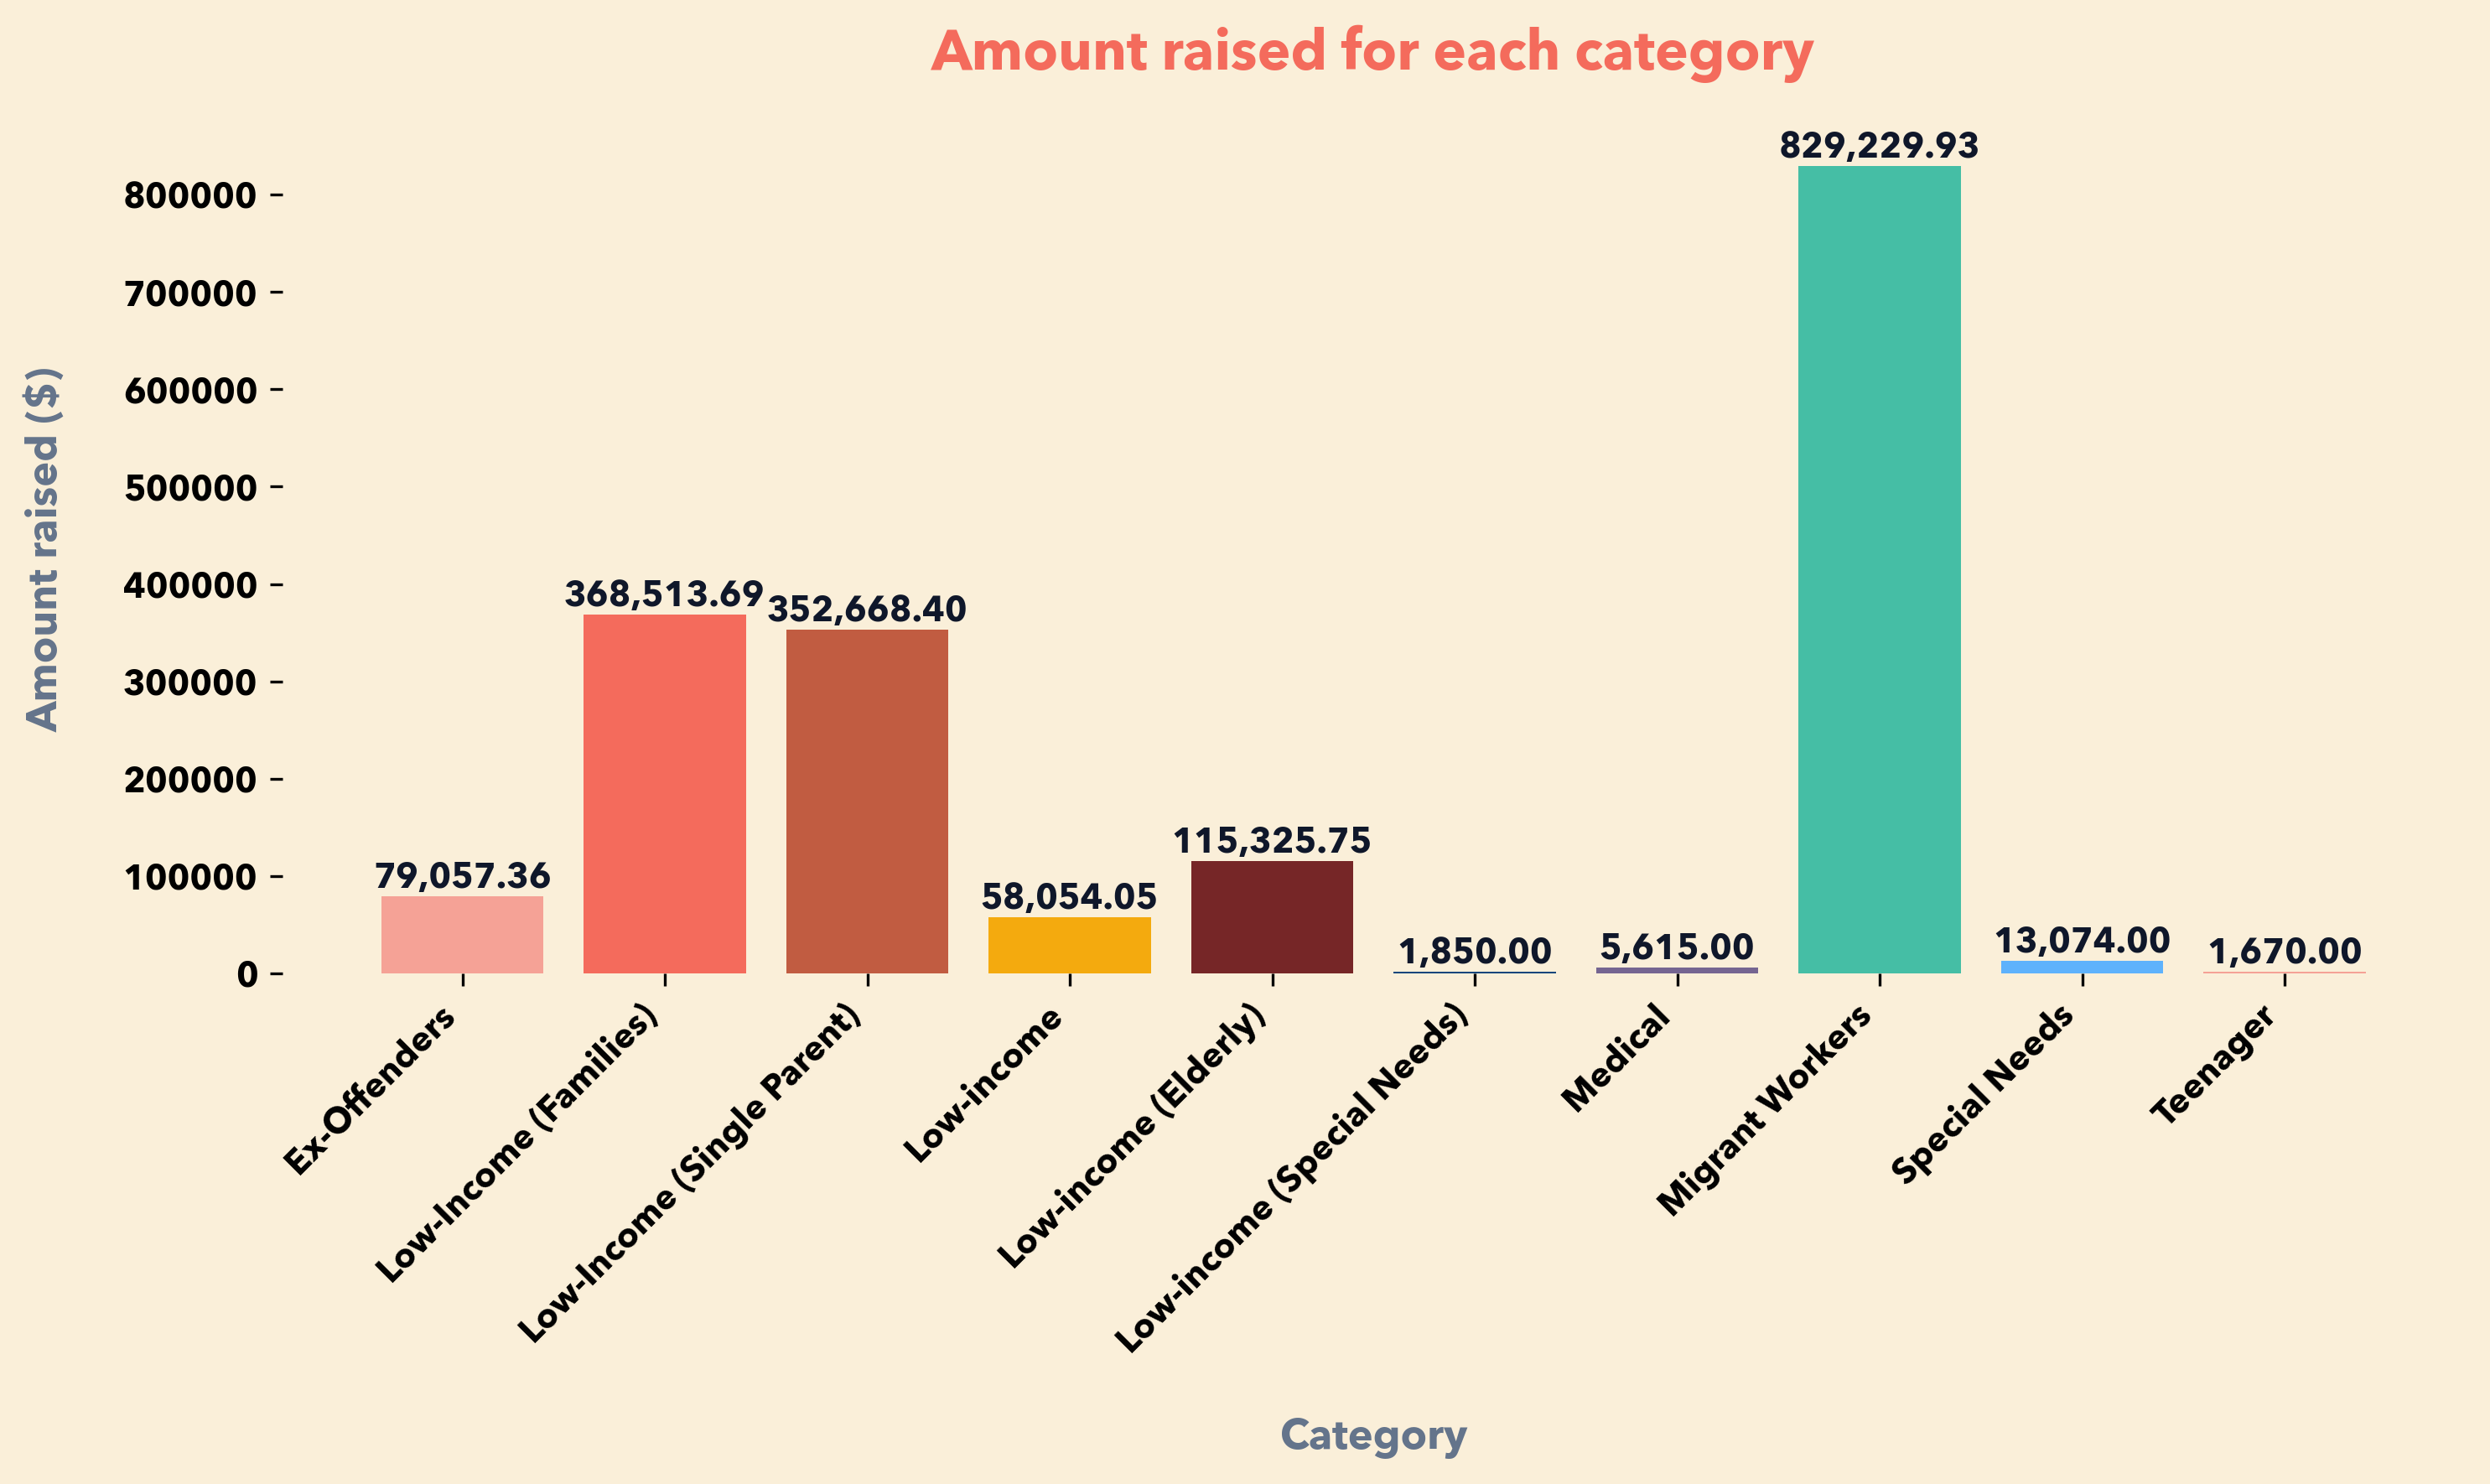

In [10]:
# Convert the series to a DataFrame for easier plotting
category_amount_raised_df = category_amount_raised.reset_index()

bar_colors = [
    COLOR_SCHEME["Pink"], 
    COLOR_SCHEME["Red"], 
    COLOR_SCHEME["Brown"], 
    COLOR_SCHEME["Yellow"],
    "#762627ff",
    COLOR_SCHEME["Blue"],
    COLOR_SCHEME["Purple"],
    COLOR_SCHEME["Green"],
    "#5eb2fcff",
]

# plt.rcParams["font.family"] = "Avenir Next"
plt.style.use('./slides.mplstyle')

# Plotting the bar plot
plt.figure(figsize=(10, 6), dpi=300)
container = plt.bar(category_amount_raised_df['Category'], category_amount_raised_df['Amount raised ($)'], color=bar_colors)
plt.bar_label(container, fmt="{:,.2f}")
plt.xlabel('Category')
plt.ylabel('Amount raised ($)')
plt.title('Amount raised for each category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [11]:
print(df.head())

       Category  Campaign Target ($)  Amount raised ($)  % raised  \
0  Ex-Offenders                786.0              786.0      87.0   
1  Ex-Offenders                200.0              200.0      50.0   
2  Ex-Offenders                 52.0               52.0       8.0   
3  Ex-Offenders                256.0              256.0      50.0   
4  Ex-Offenders                645.0              645.0     100.0   

   Amount disbursed ($)  Year  
0                 786.0  2019  
1                 200.0  2019  
2                  52.0  2019  
3                 256.0  2019  
4                 645.0  2019  


Text(0.5, 1.0, 'Amount raised for each category over different years')

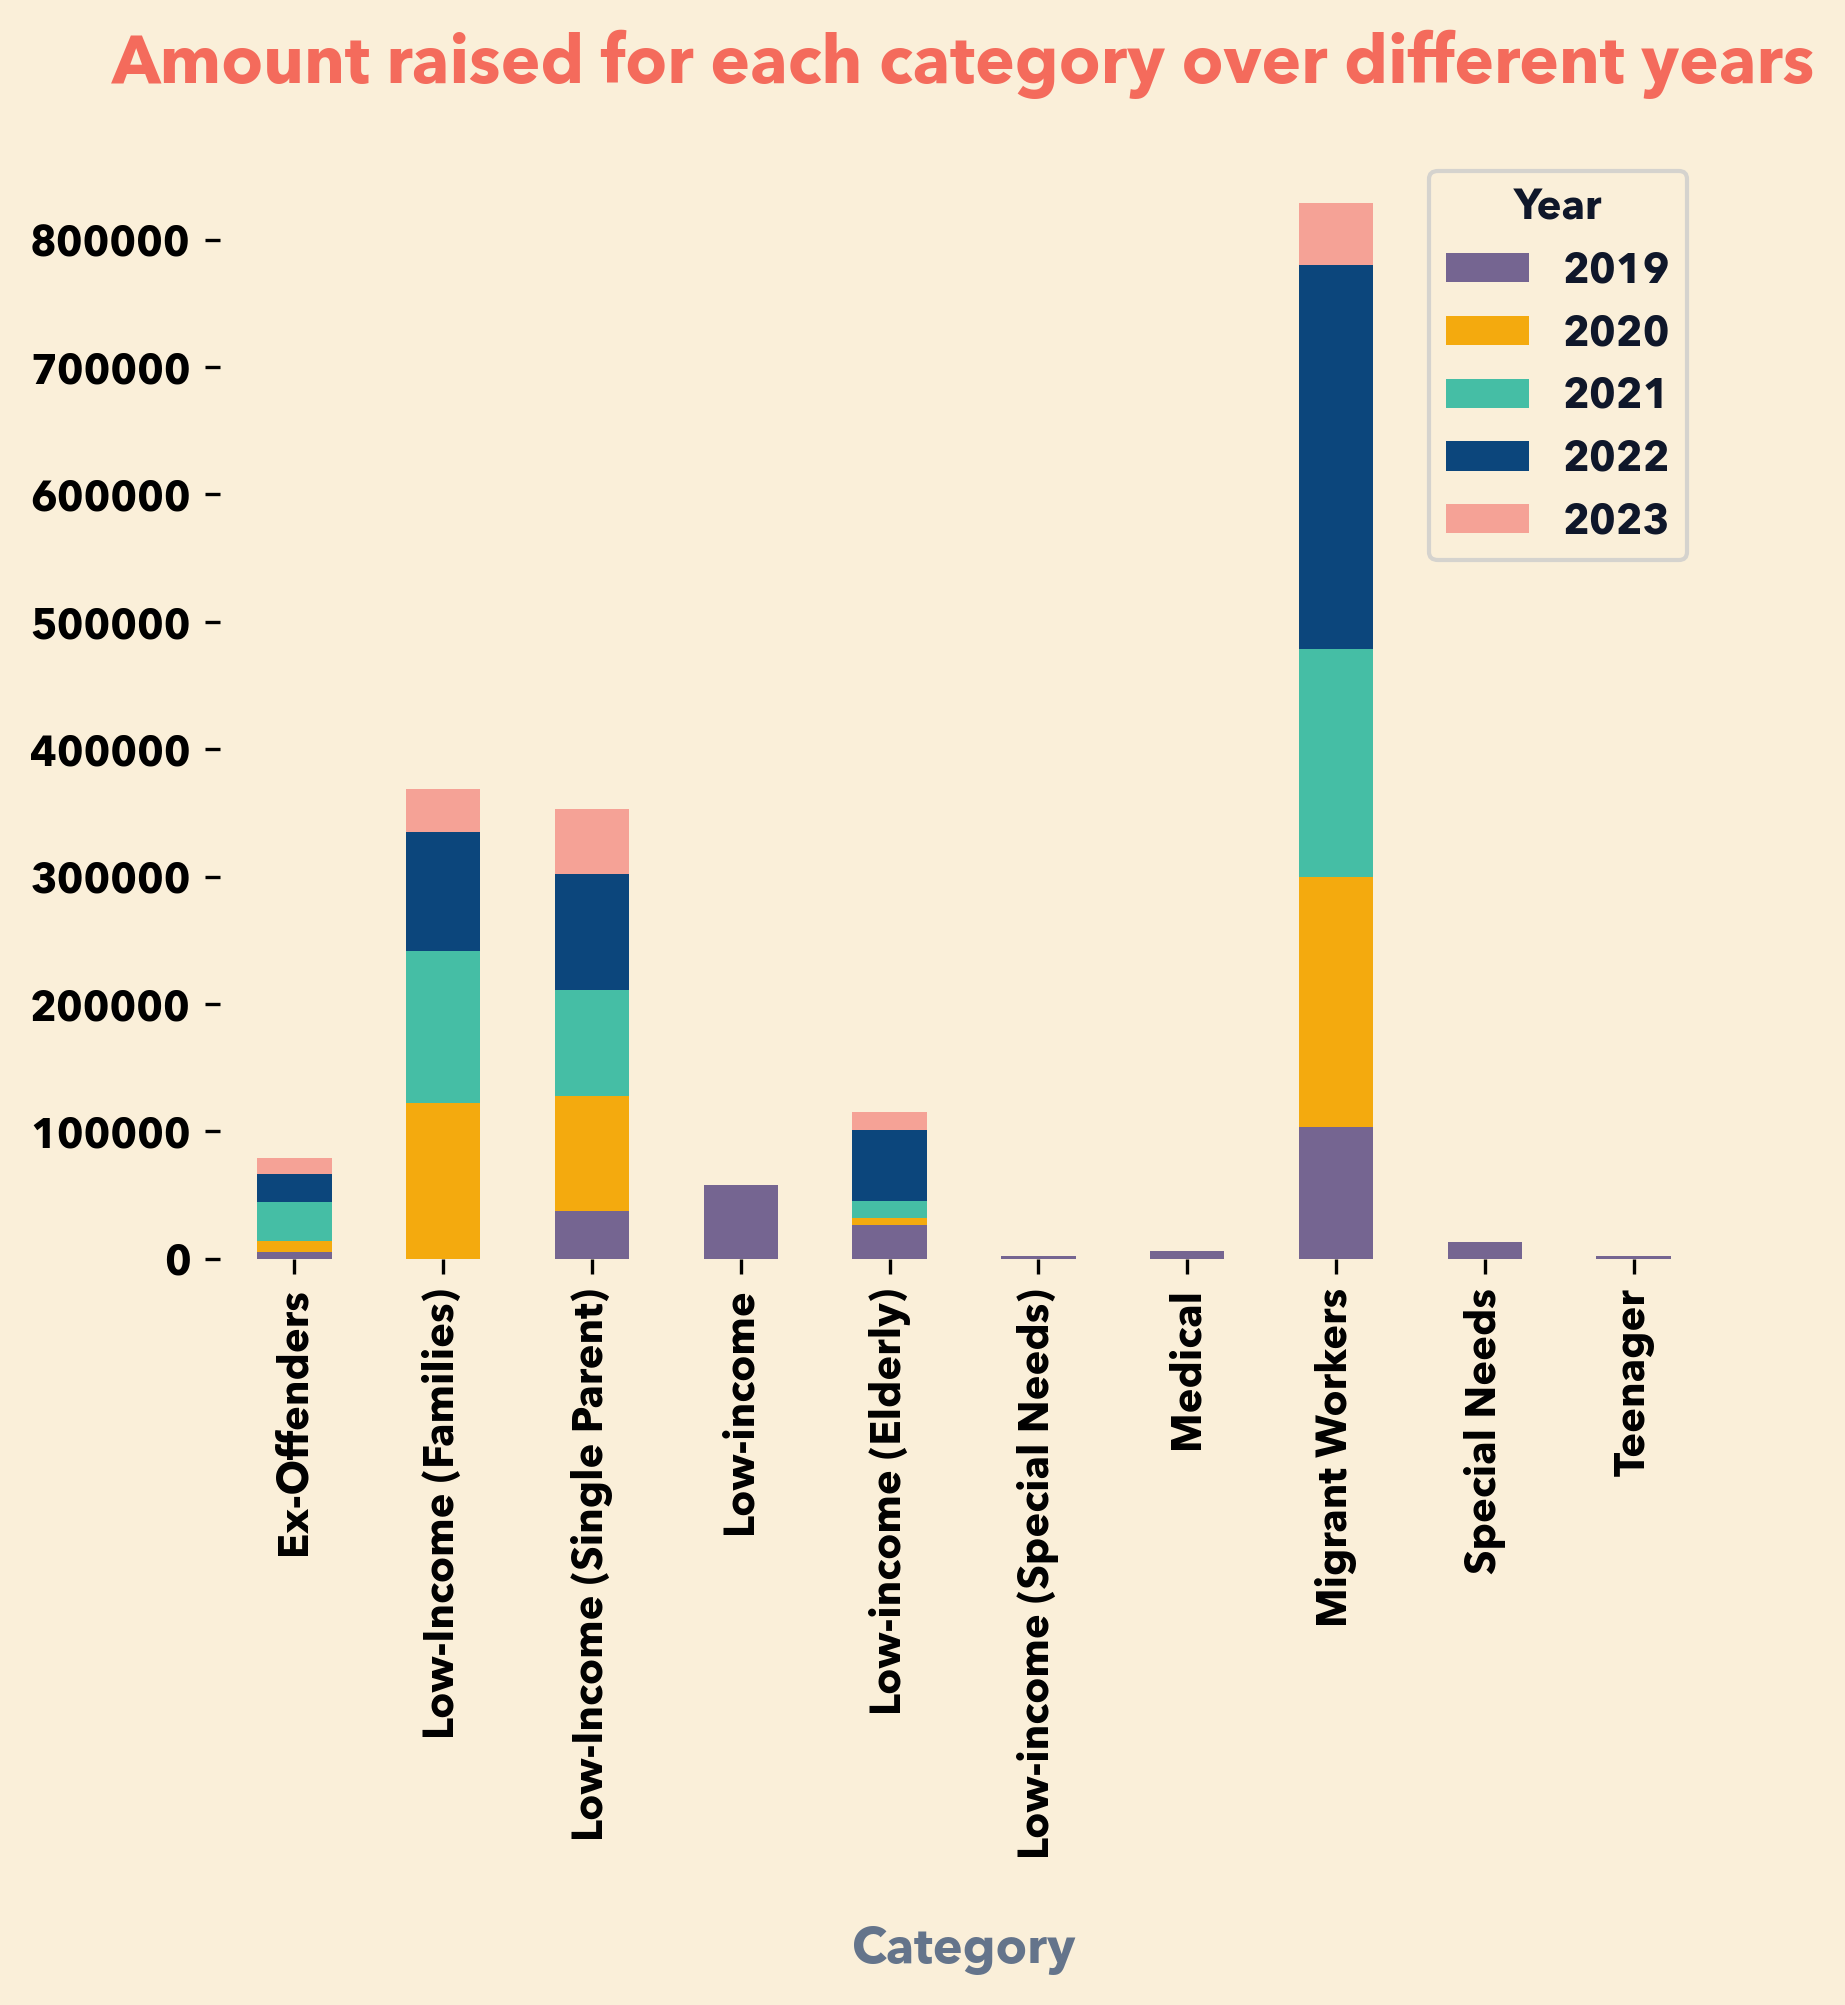

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('./slides.mplstyle')

# Grouping by both "Category" and "Year" and calculating the sum of "Amount raised ($)" for each category and year
category_year_amount_raised = df.groupby(['Category', 'Year'])['Amount raised ($)'].sum().unstack()
#print(category_year_amount_raised)

ax = category_year_amount_raised.plot.bar(stacked= True)
ax.figure.set_dpi(300)

ax.set_title('Amount raised for each category over different years')



In [13]:
#zoom into migrant workers
# Create boxplot using Matplotlib
# Filter data for "Migrant Workers" category
migrant_workers_data = df[df['Category'] == 'Migrant Workers']
print(migrant_workers_data['Amount raised ($)'].describe())
print(migrant_workers_data['Amount raised ($)'].sum())


count       215.000000
mean       3856.883395
std        8303.337075
min         191.030000
25%        1304.500000
50%        2310.000000
75%        3236.665000
max      105595.870000
Name: Amount raised ($), dtype: float64
829229.9299999999


Year
2019    103307.00
2020    196203.75
2021    178812.31
2022    301762.84
2023     49144.03
Name: Amount raised ($), dtype: float64


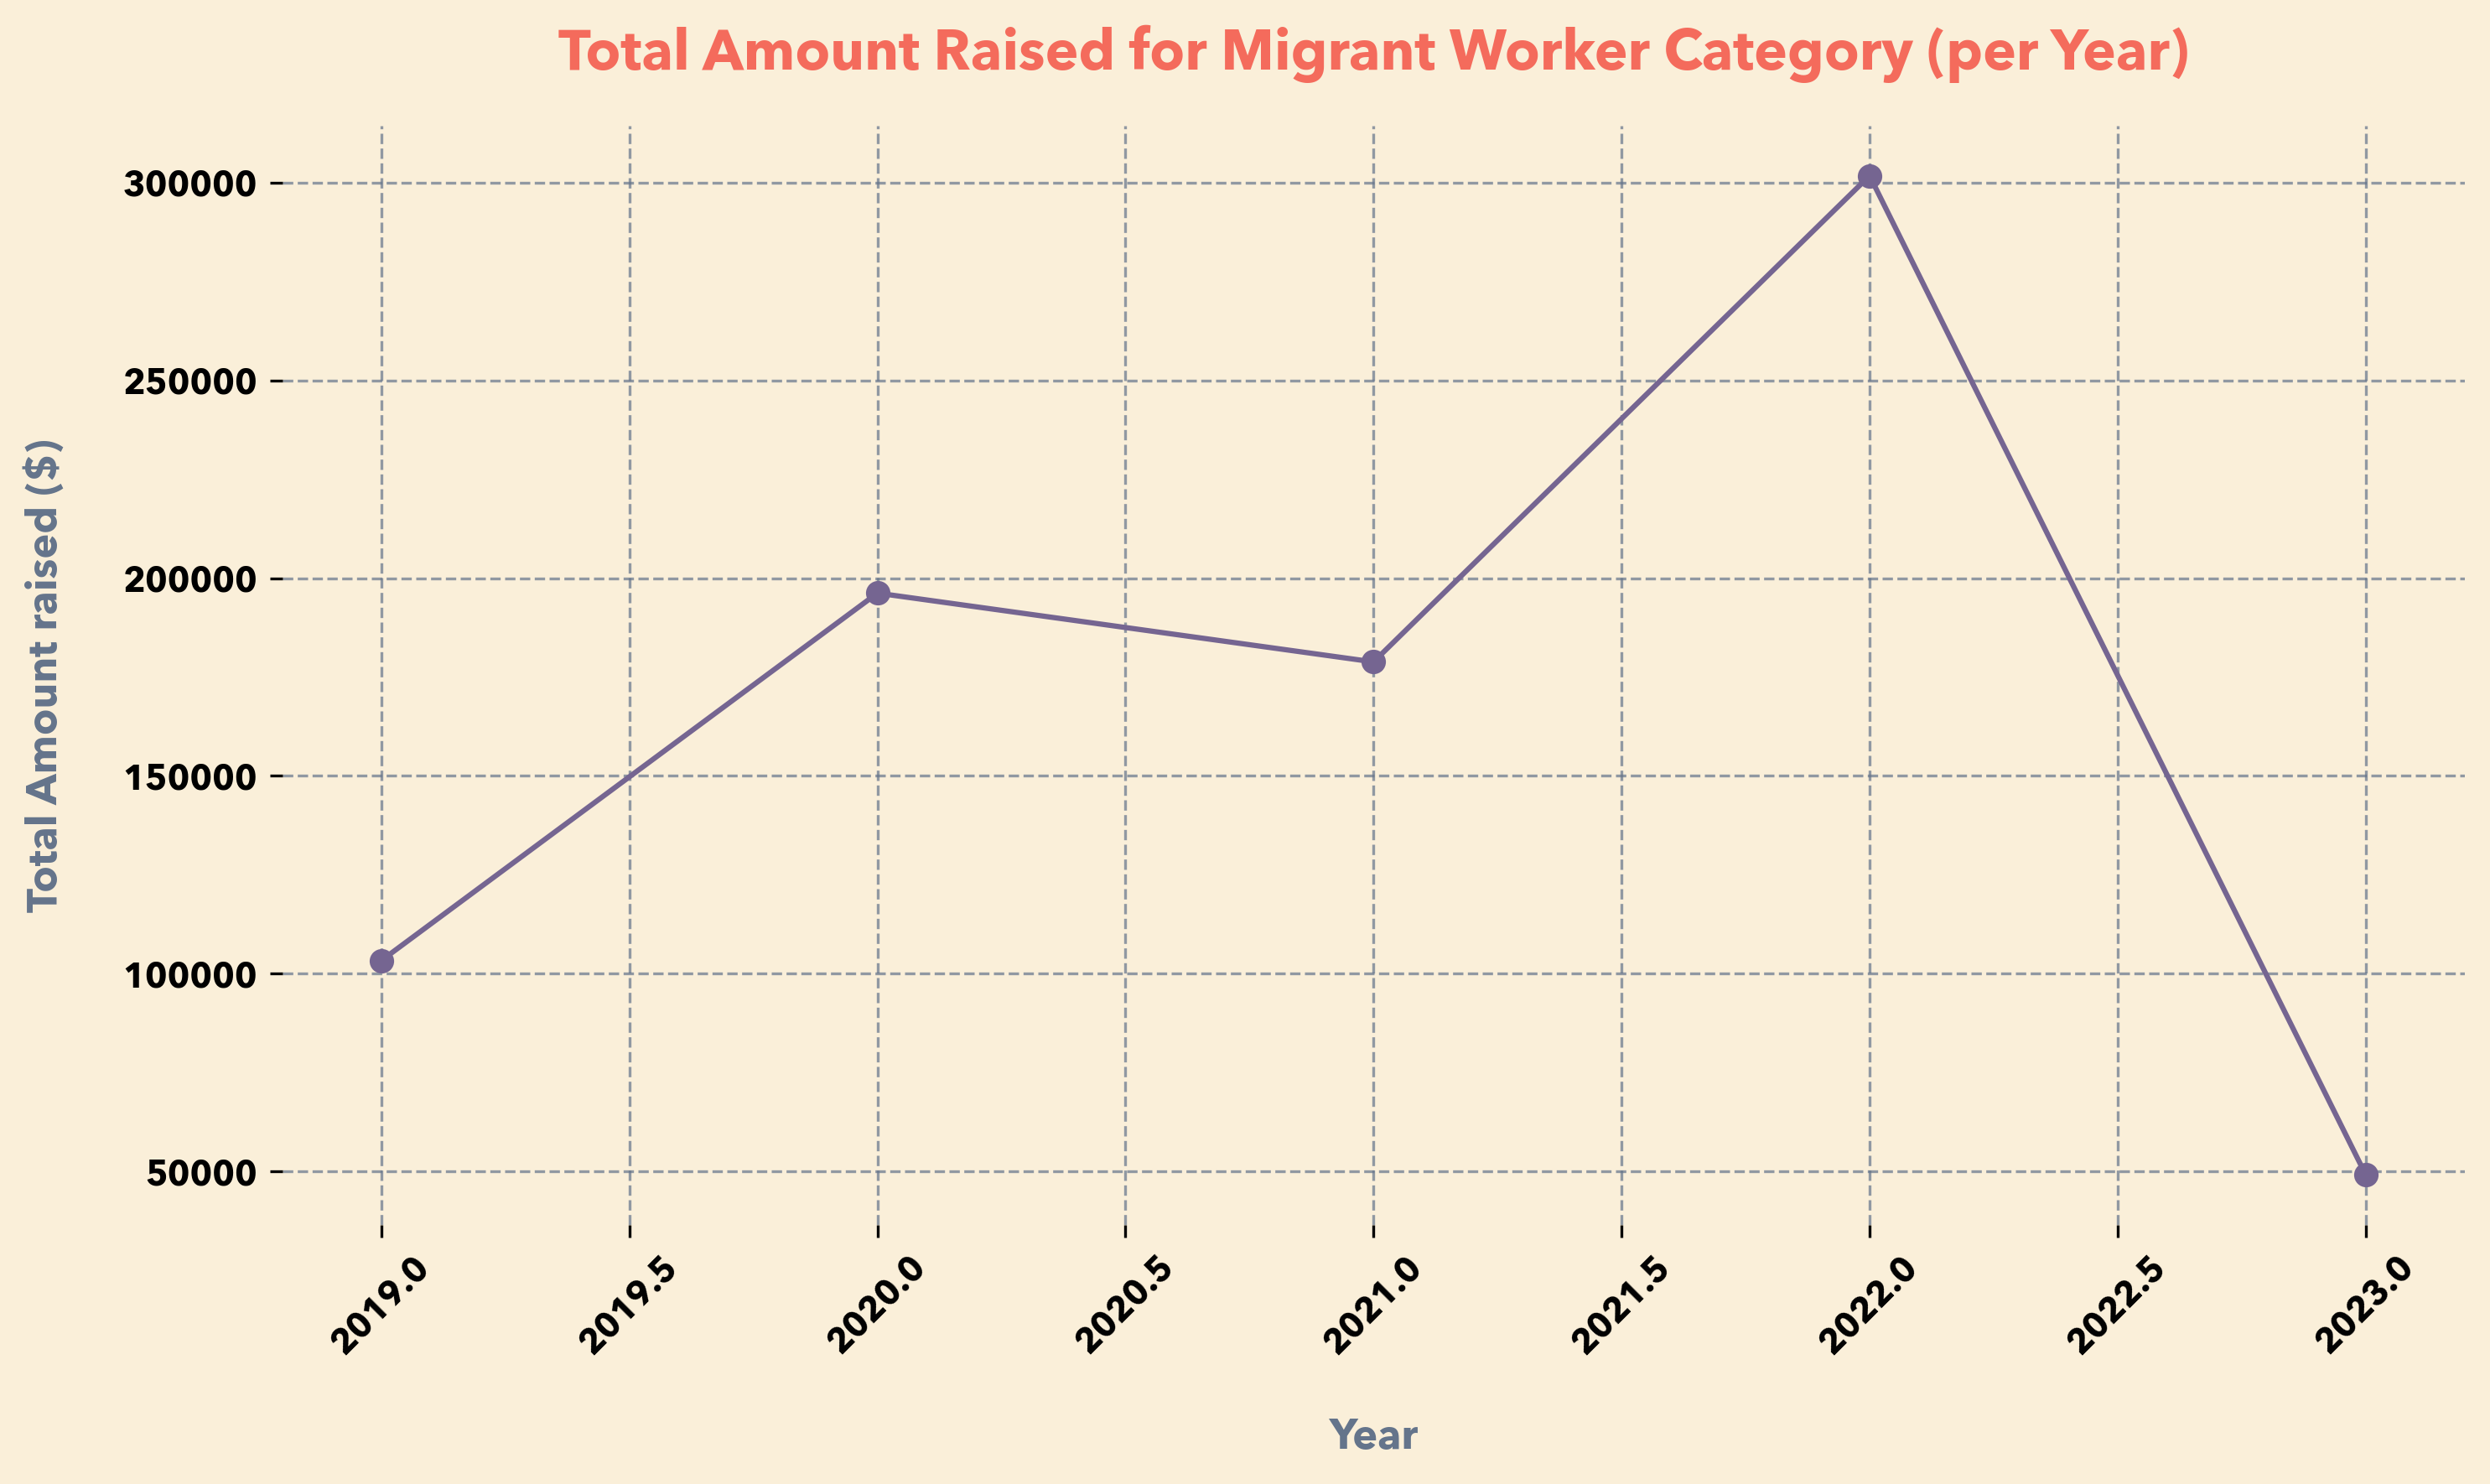

In [14]:

# Group by year and calculate total amount raised for each year
total_amount_raised_per_year = migrant_workers_data.groupby('Year')['Amount raised ($)'].sum()
print(total_amount_raised_per_year)

plt.style.use('./slides.mplstyle')

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(total_amount_raised_per_year.index, total_amount_raised_per_year.values, marker='o', linestyle='-')
plt.title('Total Amount Raised for Migrant Worker Category (per Year)')
plt.xlabel('Year')
plt.ylabel('Total Amount raised ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

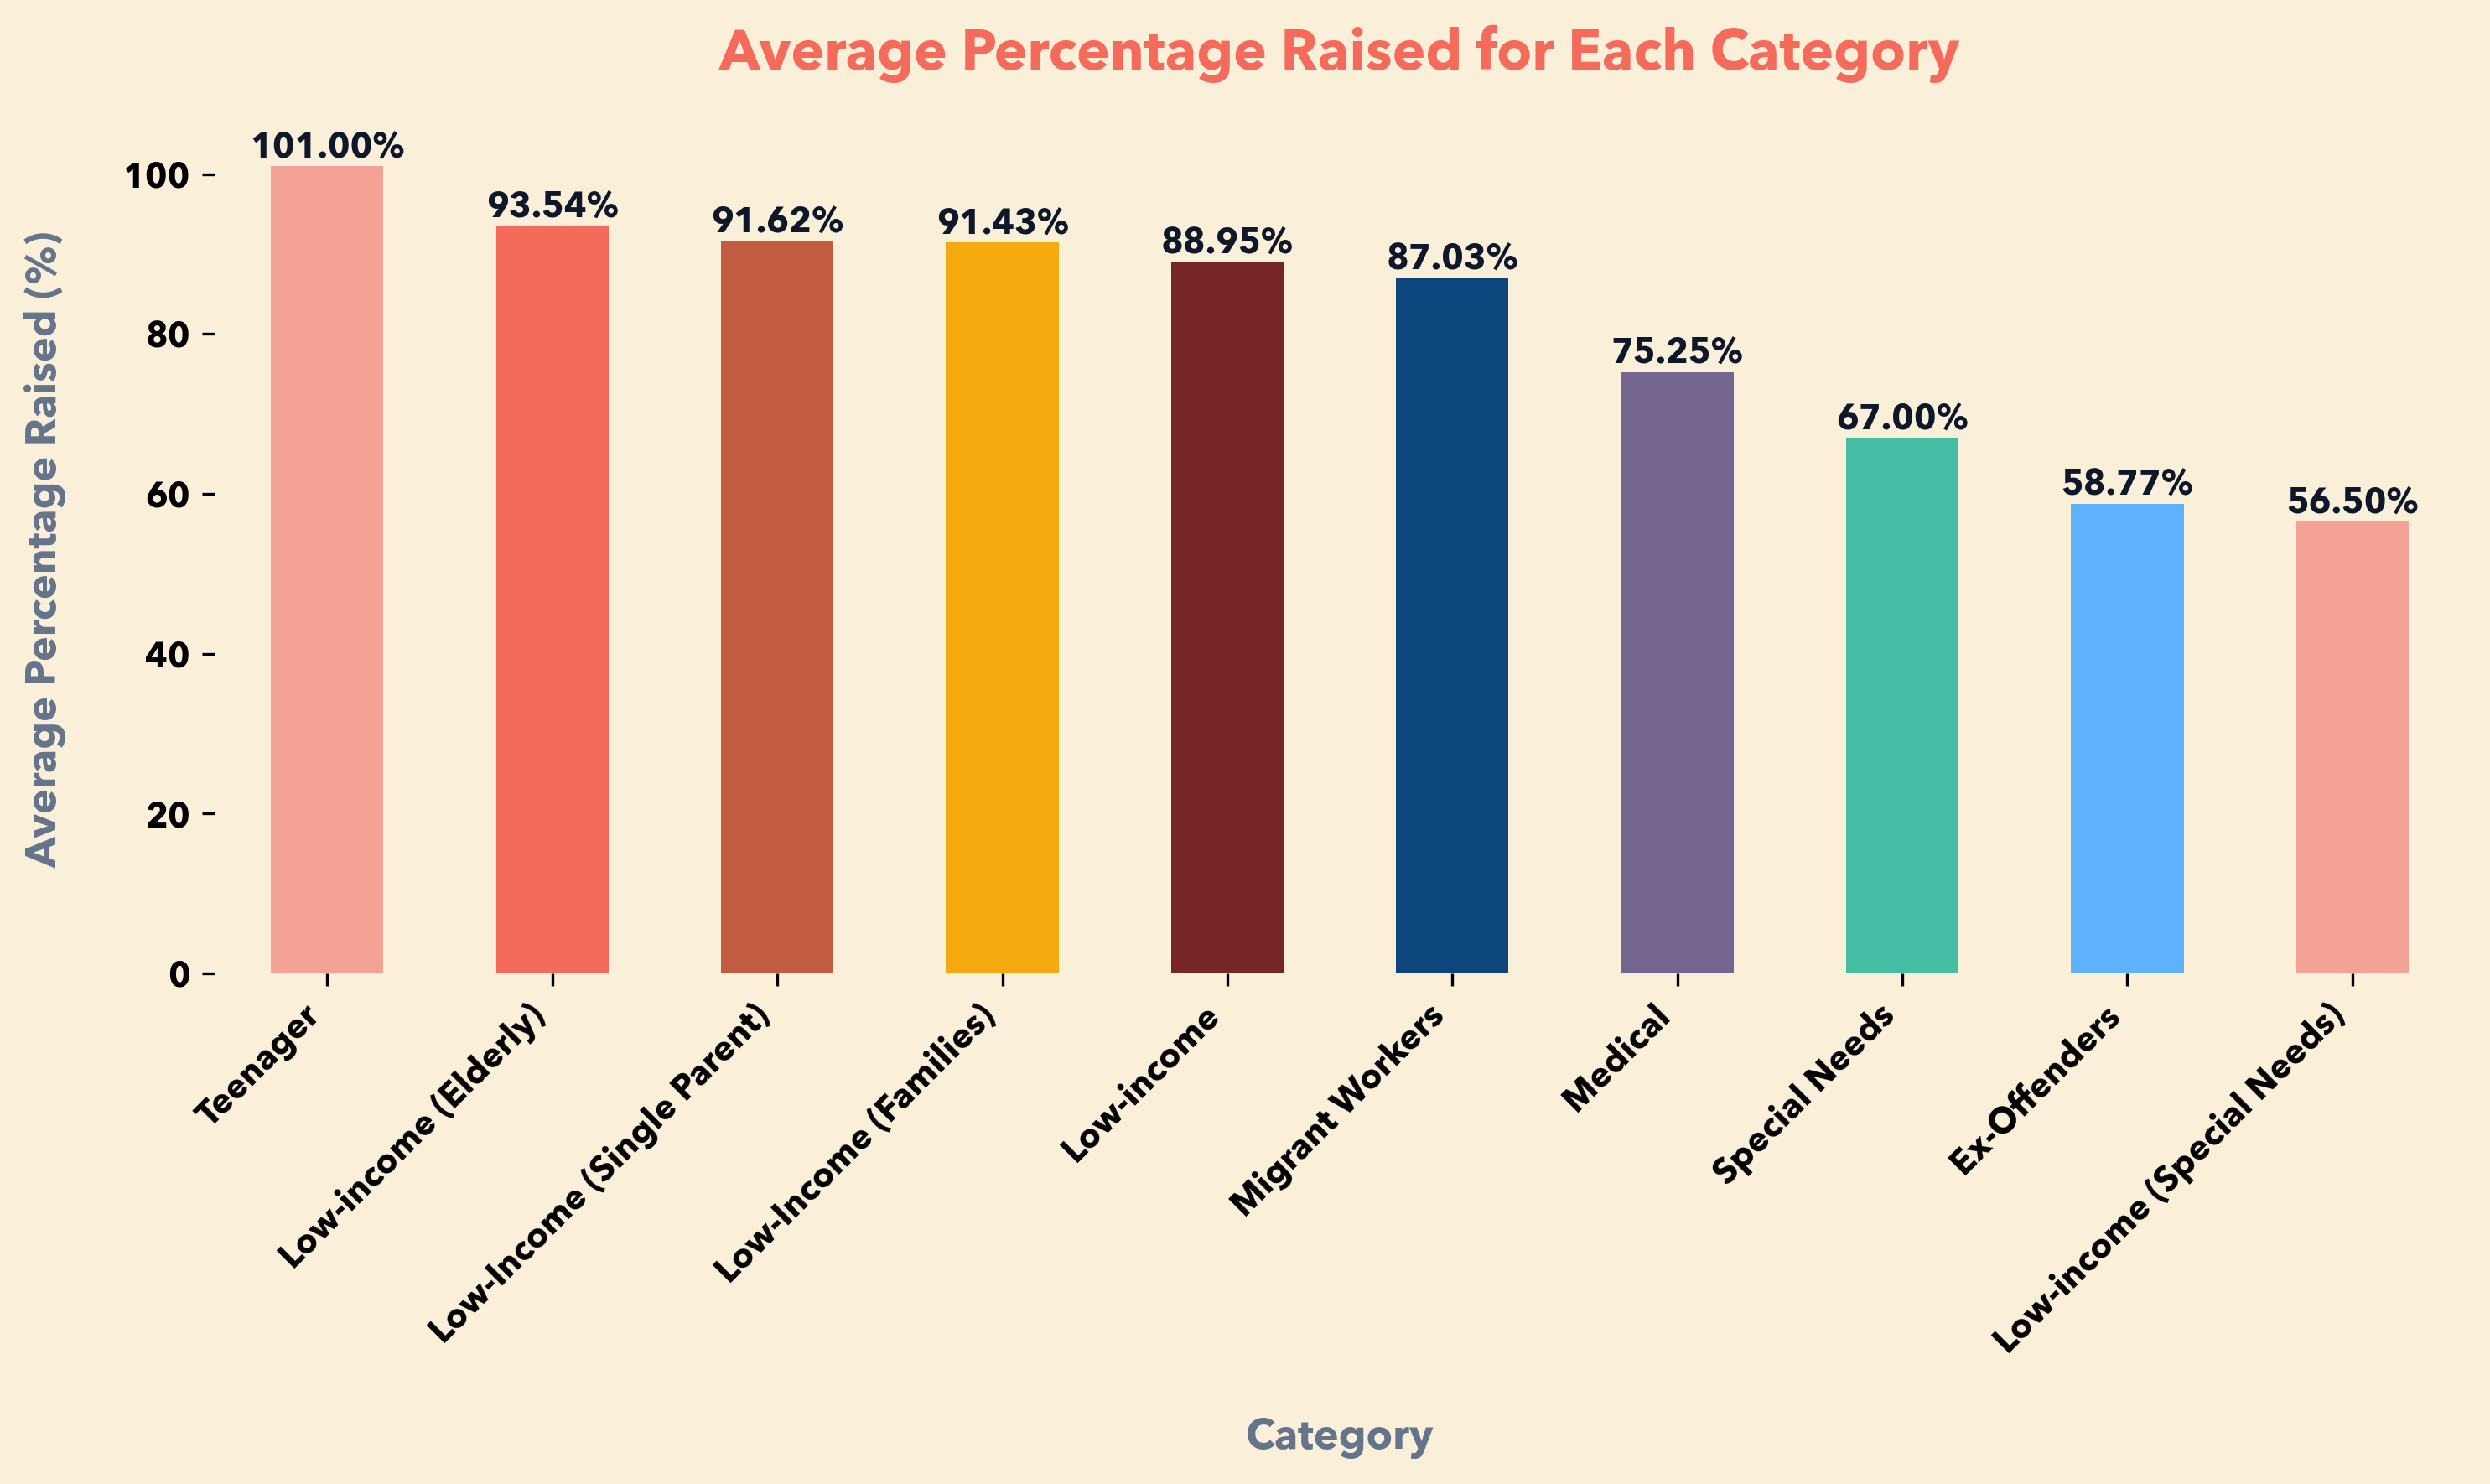

In [15]:
# Group the data by the 'Category' column and calculate the average percentage raised
average_percent_raised = df.groupby('Category')['% raised'].mean()

# Sort the average percentage raised in descending order
average_percent_raised_sorted = average_percent_raised.sort_values(ascending=False)

colors = [
    COLOR_SCHEME["Pink"], 
    COLOR_SCHEME["Red"], 
    COLOR_SCHEME["Brown"], 
    COLOR_SCHEME["Yellow"],
    "#762627ff",
    COLOR_SCHEME["Blue"],
    COLOR_SCHEME["Purple"],
    COLOR_SCHEME["Green"],
    "#5eb2fcff",
]

# Plot the average percentage raised for each category
plt.figure(figsize=(10, 6), dpi=300)
bars = average_percent_raised_sorted.plot(kind='bar',color=colors)
plt.title('Average Percentage Raised for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Percentage Raised (%)')
plt.xticks(rotation=45, ha='right')

# Add quantitative label on each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}%', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Target Bin
0 - 500           49.900000
501 - 1,000       78.931034
1,001 - 1,500     91.600000
1,501 - 2000      97.125000
2,001 - 2,500     88.090909
2,501 - 3,000     99.310345
3,001 - 4,000     96.423077
4,001 - 5,000     82.750000
5,001 - 10,000    75.666667
10,000 +          80.666667
Name: % raised, dtype: float64


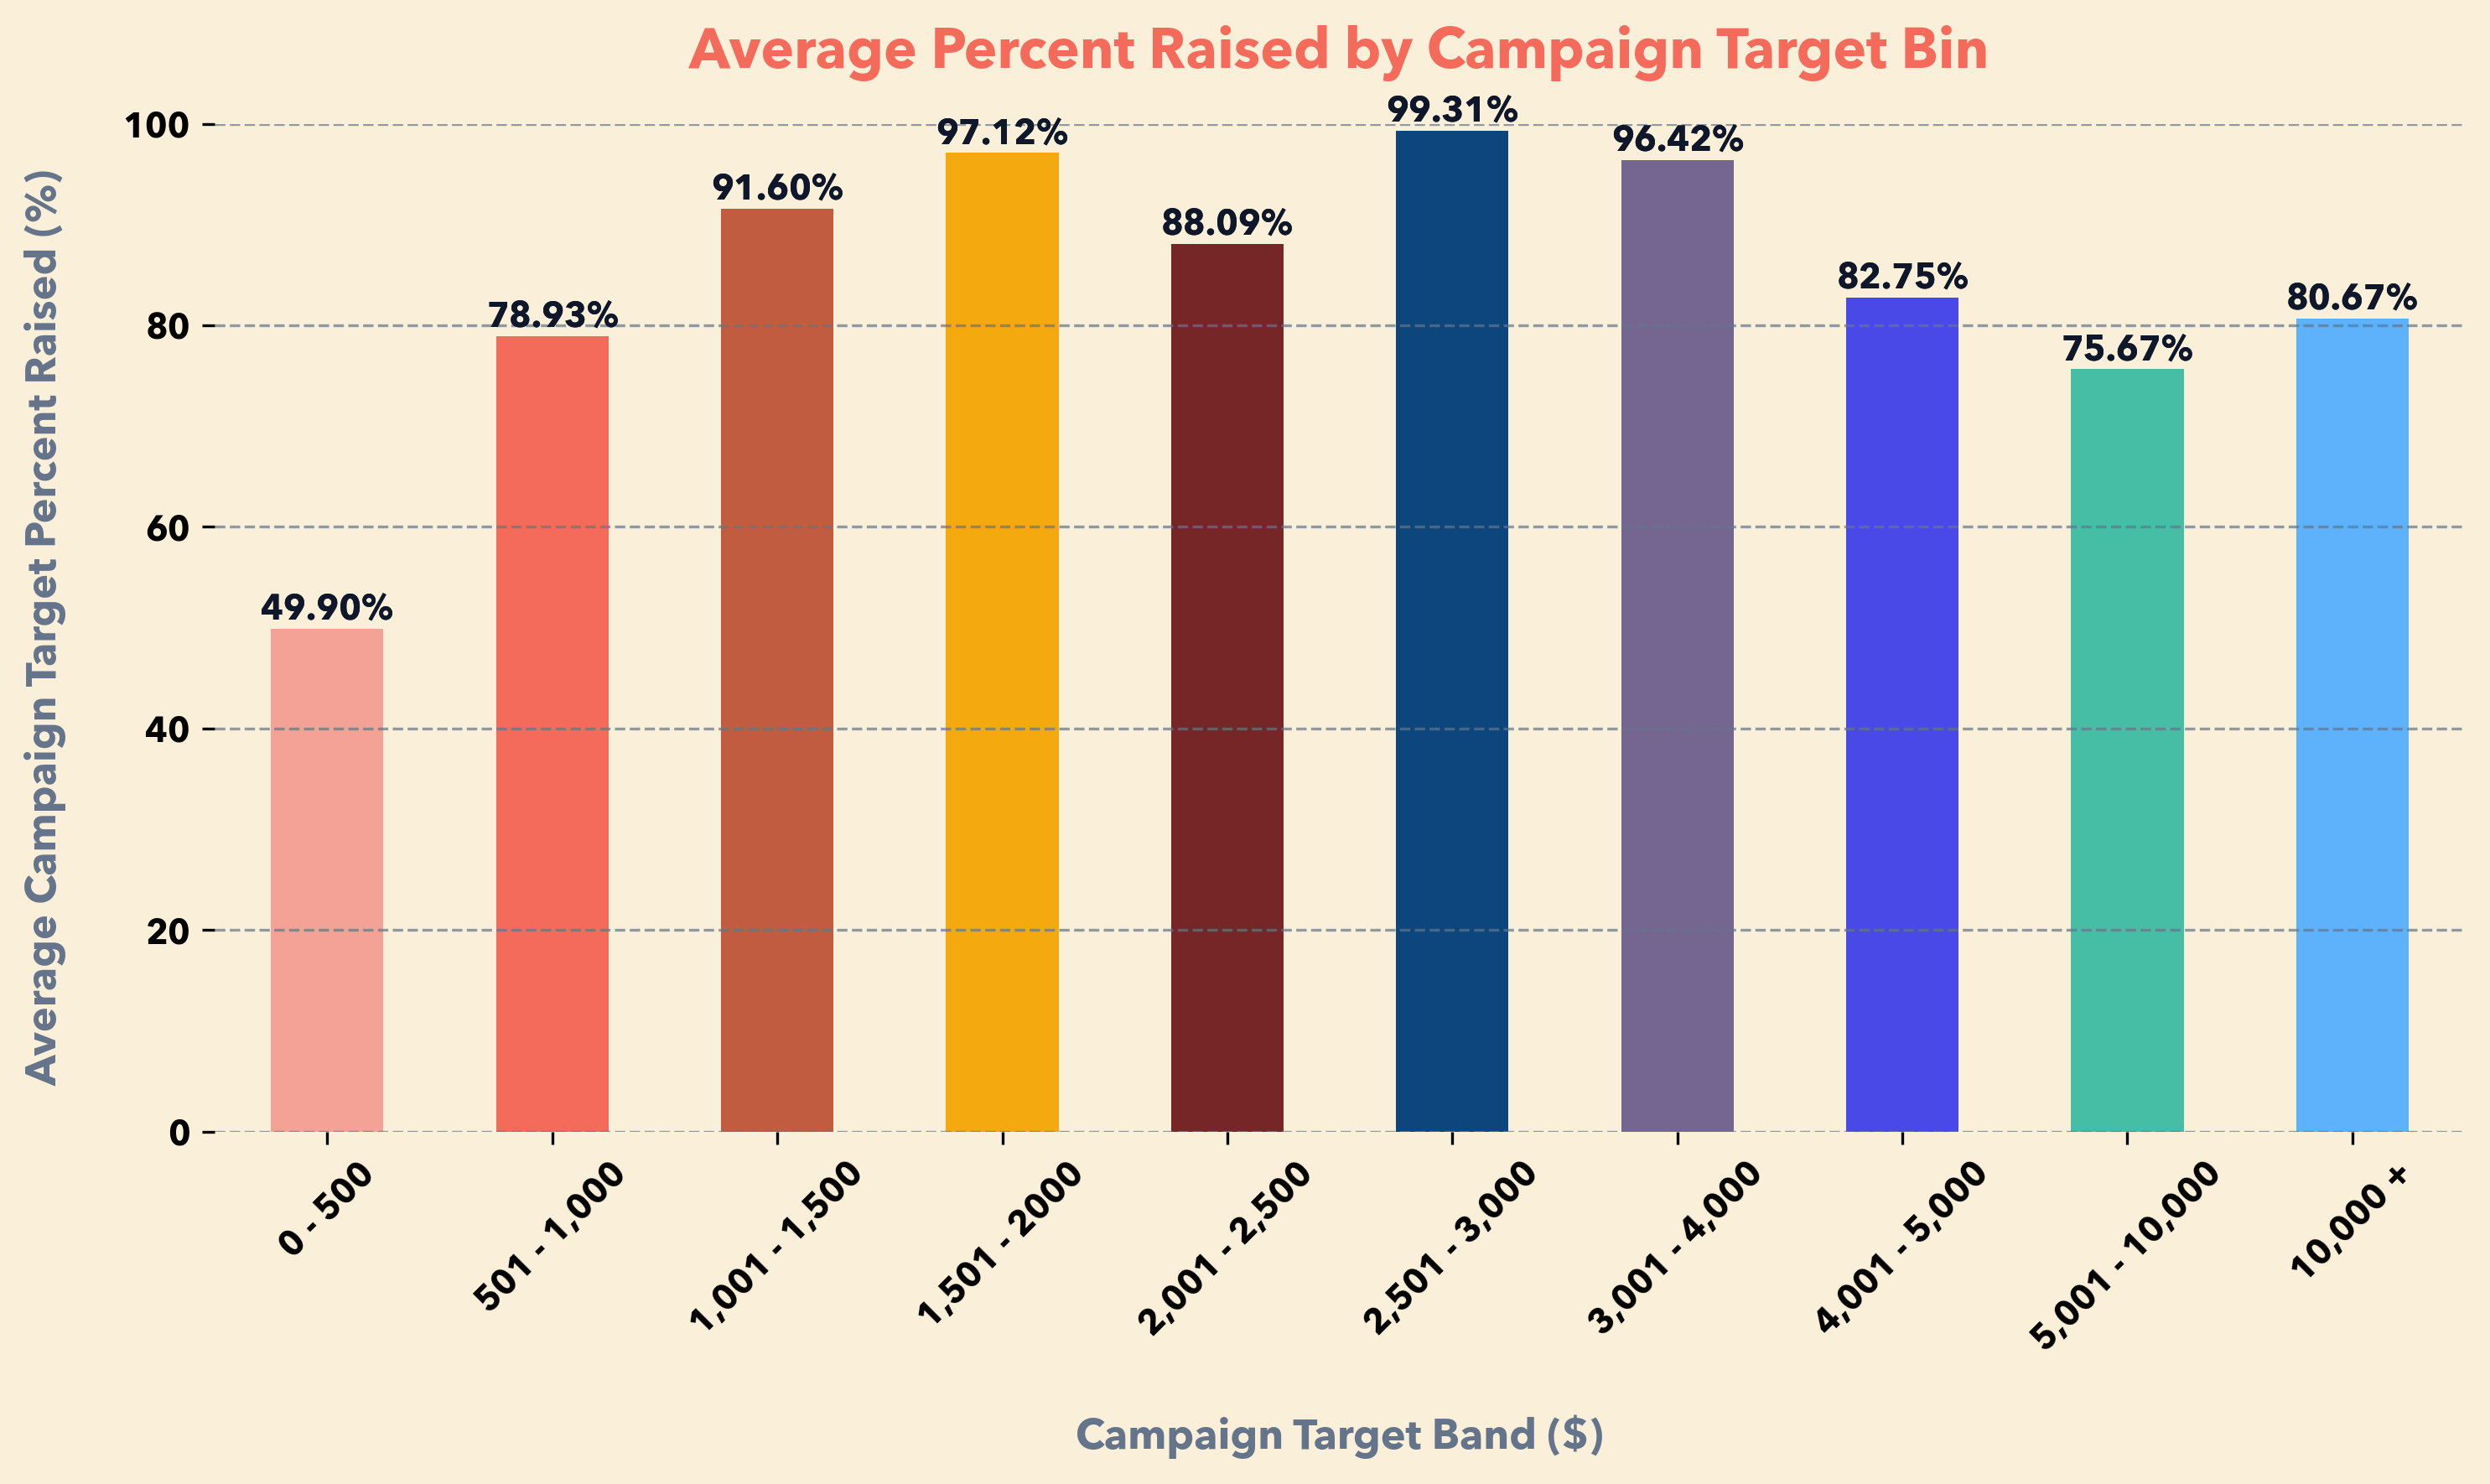

In [21]:
#Higher target campaigns are harder to raise the funds fully (proved)

plt.style.use('./slides.mplstyle')

# Automatically determine the bins and bin labels
num_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 10000, float('inf')]
bin_labels = ['0 - 500', '501 - 1,000', '1,001 - 1,500', '1,501 - 2000', '2,001 - 2,500', '2,501 - 3,000', '3,001 - 4,000', '4,001 - 5,000', '5,001 - 10,000', '10,000 +']

migrant_workers_data = df[df['Category'] == 'Migrant Workers']

migrant_workers_data.loc[:, 'Target Bin'] = pd.cut(migrant_workers_data['Campaign Target ($)'], bins=num_bins, labels=bin_labels)

#migrant_workers_data['% raised'] = migrant_workers_data['% raised'].multiply(100)

# Group by the "Target Bin" and calculate the average amount raised ($) for each bin
average_amount_raised = migrant_workers_data.groupby('Target Bin', observed=False)['% raised'].mean()

# Display the average amount raised ($) for each bin
print(average_amount_raised)

colors = [
    COLOR_SCHEME["Pink"], 
    COLOR_SCHEME["Red"], 
    COLOR_SCHEME["Brown"], 
    COLOR_SCHEME["Yellow"],
    "#762627ff",
    COLOR_SCHEME["Blue"],
    COLOR_SCHEME["Purple"],
    "#4949e7ff",
    COLOR_SCHEME["Green"],
    "#5eb2fcff",
]

[]# Plotting
plt.figure(figsize=(10, 6), dpi=300)
bars = average_amount_raised.plot(kind='bar', color=colors)
plt.title('Average Percent Raised by Campaign Target Bin')
plt.xlabel('Campaign Target Band ($)')
plt.ylabel('Average Campaign Target Percent Raised (%)')
plt.bar_label(bars.containers[0], label_type='edge', fmt="%.2f%%")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add quantitative label on each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}%', 
             ha='center', va='bottom')

# Raise the y-axis limit to 100
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

/var/folders/5s/j2ns7w_90xd4chty5twn4x400000gn/T/ipykernel_24504/542507887.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raised_count = migrant_workers_data[migrant_workers_data['% raised'] >= 100].groupby('Target Bin').size()


Target Bin
0 - 500            2
501 - 1,000       18
1,001 - 1,500     19
1,501 - 2000      17
2,001 - 2,500     20
2,501 - 3,000     26
3,001 - 4,000     22
4,001 - 5,000      9
5,001 - 10,000     7
10,000 +           5
dtype: int64


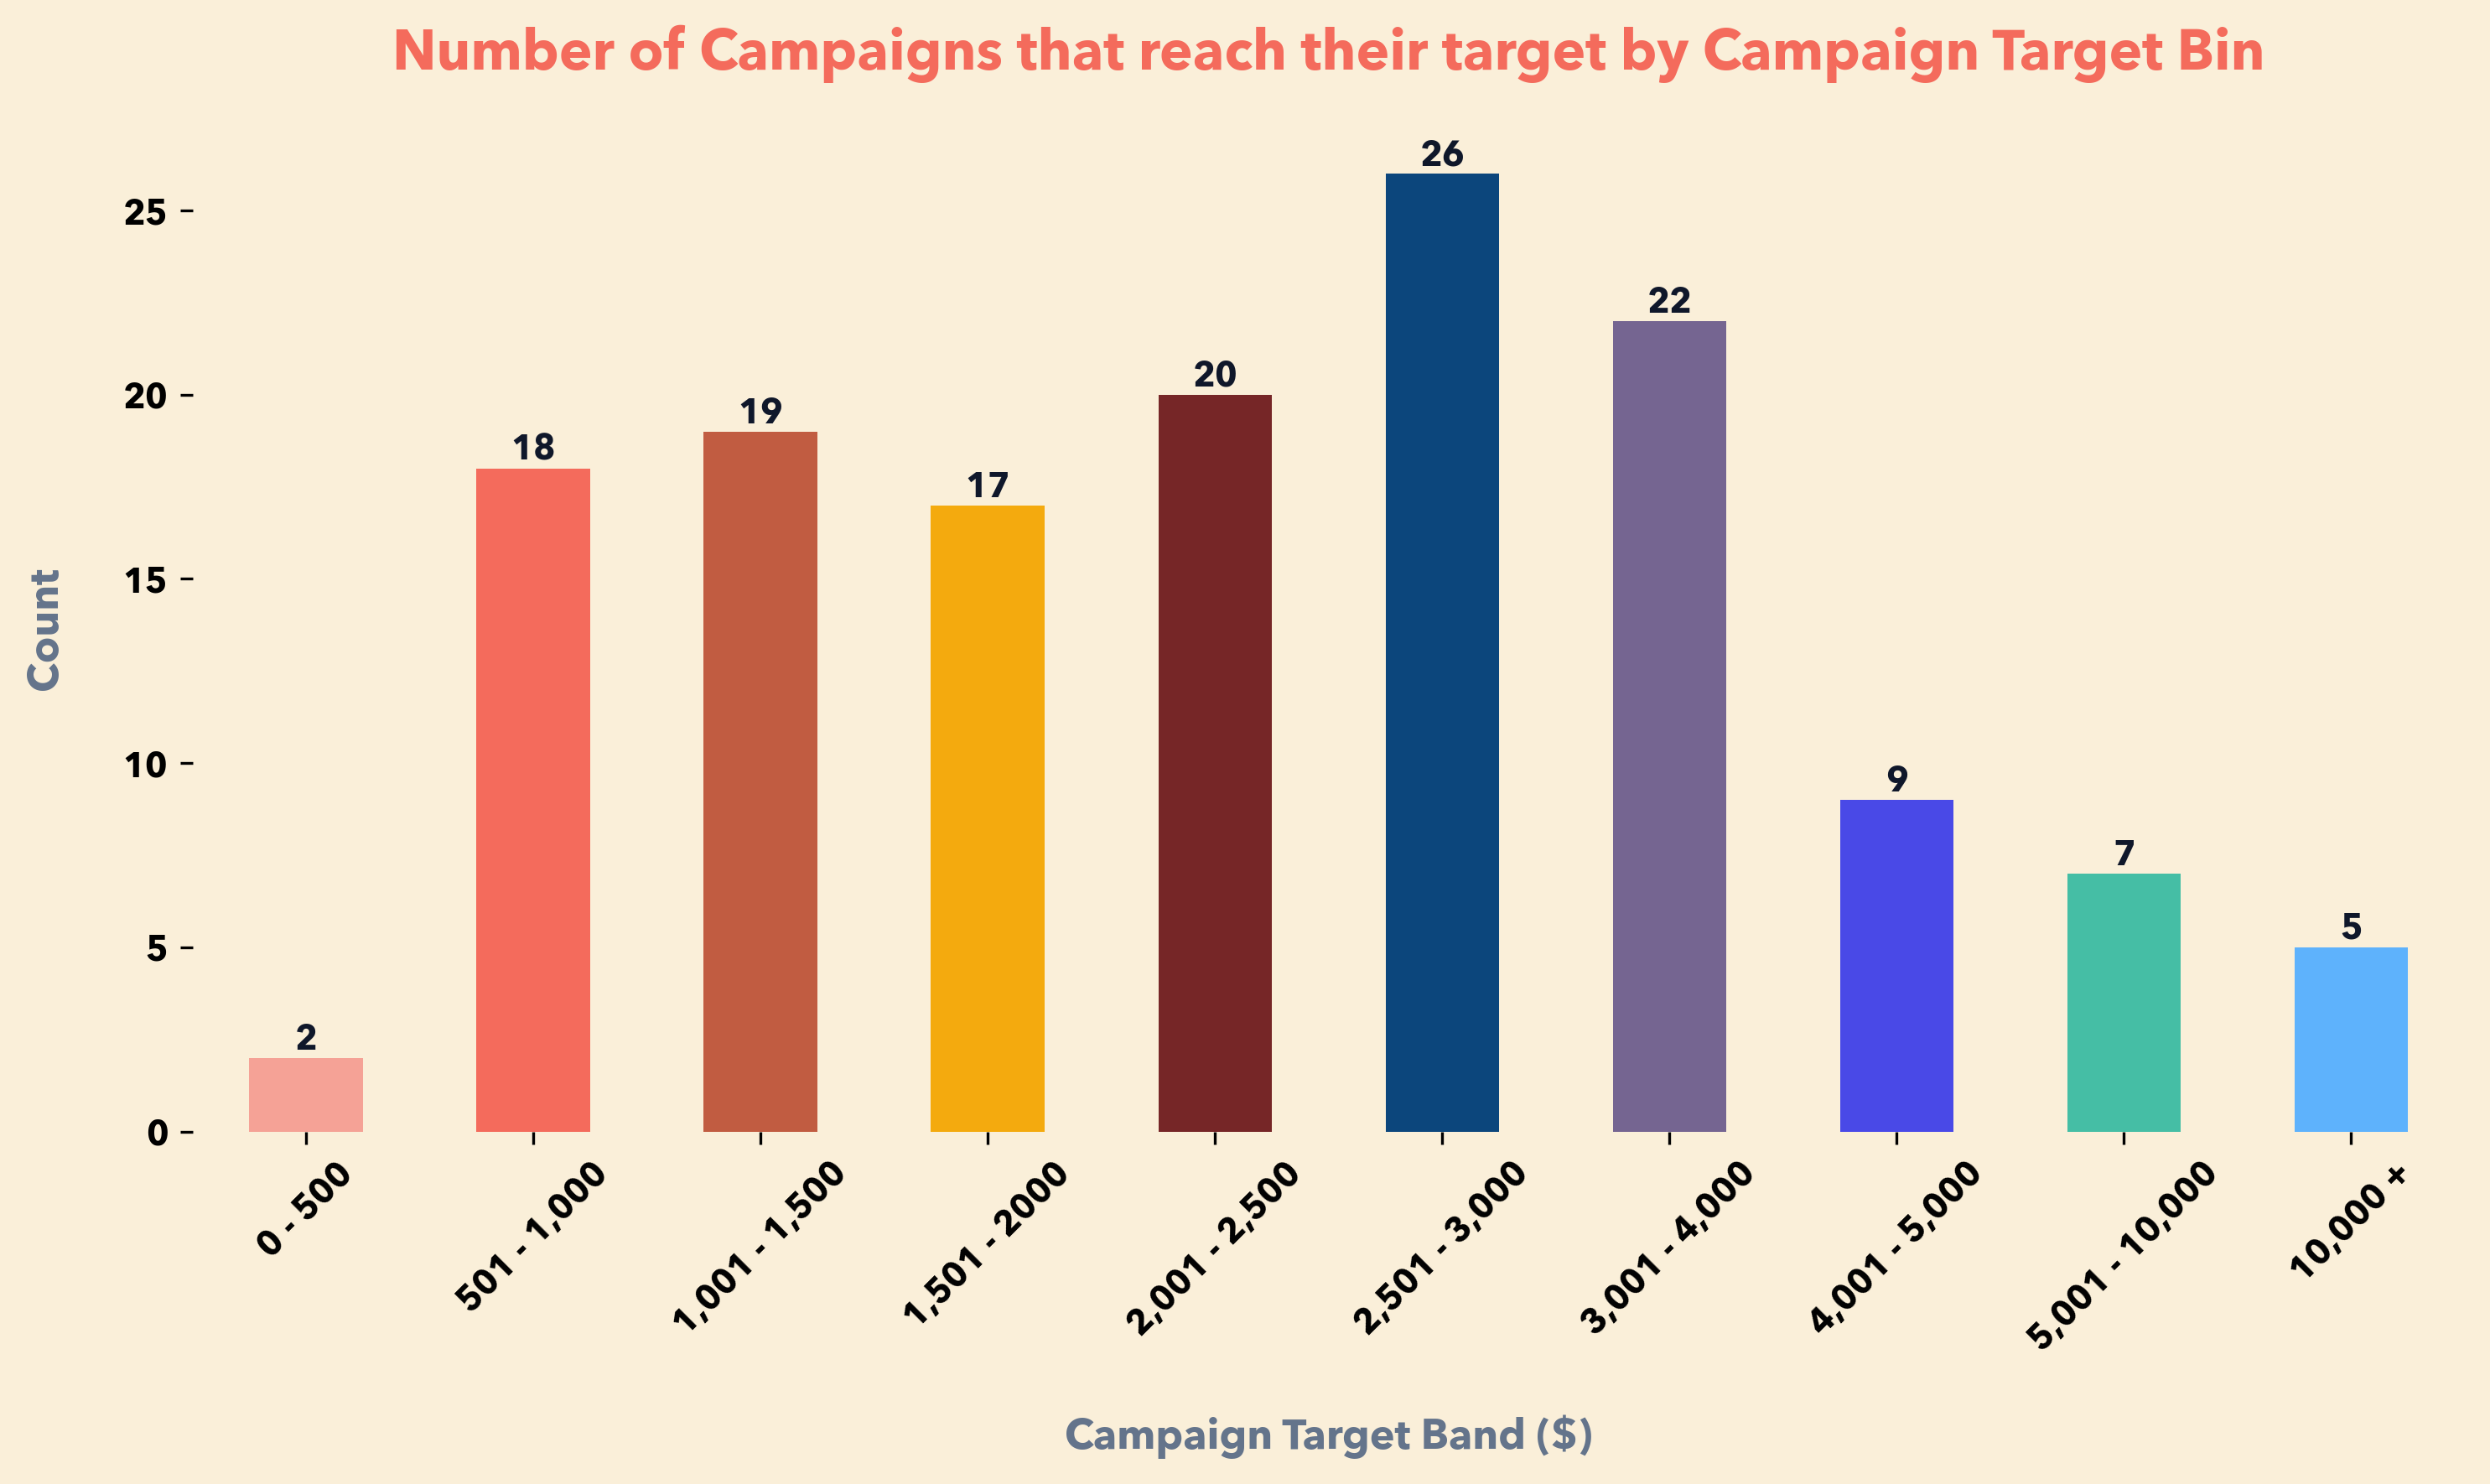

In [20]:

# Automatically determine the bins and bin labels
num_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 4000,5000, 10000, float('inf')]
bin_labels = ['0 - 500', '501 - 1,000', '1,001 - 1,500', '1,501 - 2000', '2,001 - 2,500', '2,501 - 3,000', '3,001 - 4,000', '4,001 - 5,000','5,001 - 10,000', '10,000 +']

migrant_workers_data = df[df['Category'] == 'Migrant Workers']

# Bin the 'Campaign Target ($)' column
migrant_workers_data['Target Bin'] = pd.cut(migrant_workers_data['Campaign Target ($)'], bins=num_bins, labels=bin_labels)

# Count the number of rows with '% raised' more than or equal to 1 for each bin
raised_count = migrant_workers_data[migrant_workers_data['% raised'] >= 100].groupby('Target Bin').size()
#num_campaign_in_each_bin = migrant_workers_data.groupby('Target Bin').size()

print(raised_count)
#print(num_campaign_in_each_bin)
# Plot the count for each campaign target bin
plt.figure(figsize=(10, 6), dpi=300)
bars = raised_count.plot(kind='bar', color=colors)
plt.title('Number of Campaigns that reach their target by Campaign Target Bin')
plt.xlabel('Campaign Target Band ($)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add quantitative label on each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


/var/folders/5s/j2ns7w_90xd4chty5twn4x400000gn/T/ipykernel_24504/3034722546.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raised_count = migrant_workers_data[migrant_workers_data['% raised'] >= 100].groupby('Target Bin').size()
/var/folders/5s/j2ns7w_90xd4chty5twn4x400000gn/T/ipykernel_24504/3034722546.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_campaigns_count = migrant_workers_data.groupby('Target Bin').size()


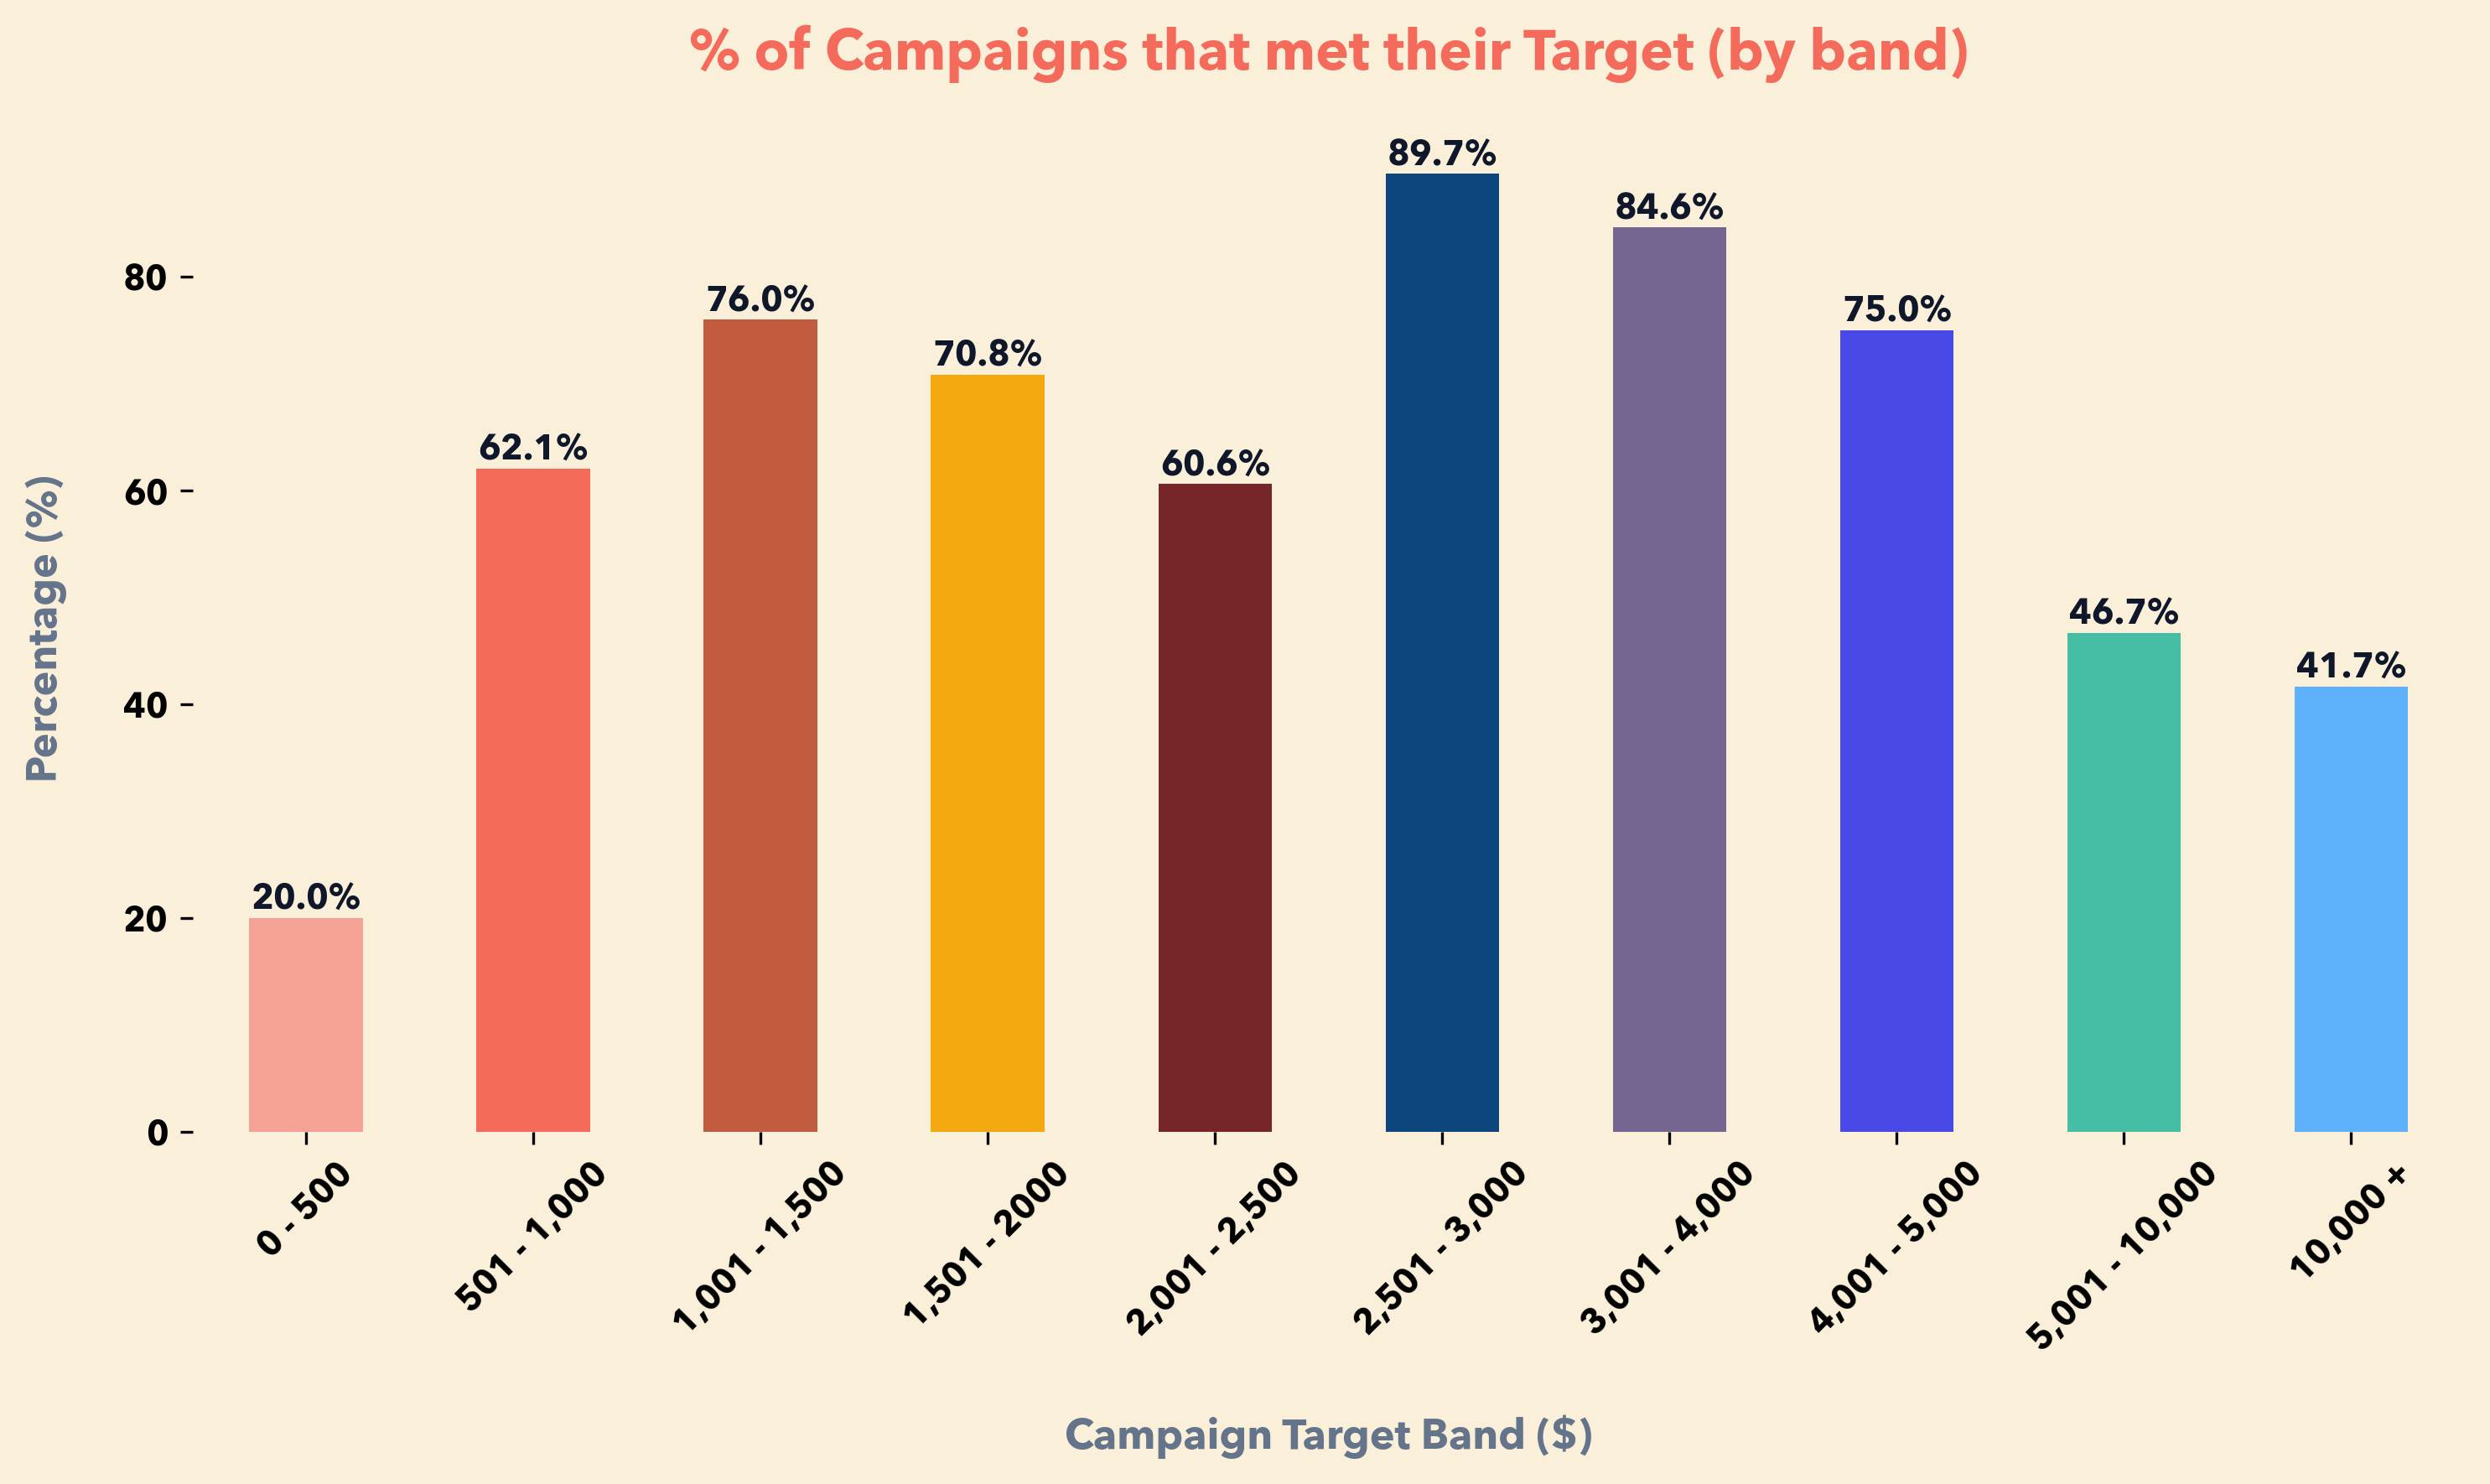

In [19]:

migrant_workers_data = df[df['Category'] == 'Migrant Workers']

# Bin the 'Campaign Target ($)' column
migrant_workers_data['Target Bin'] = pd.cut(migrant_workers_data['Campaign Target ($)'], bins=num_bins, labels=bin_labels)

# Count the number of campaigns with '% raised' more than or equal to 100 for each bin
raised_count = migrant_workers_data[migrant_workers_data['% raised'] >= 100].groupby('Target Bin').size()

# Count the total number of campaigns in each bin
total_campaigns_count = migrant_workers_data.groupby('Target Bin').size()

# Calculate the percentage of campaigns that reach more than or equal to 100% raised for each bin
percentage_raised = (raised_count / total_campaigns_count) * 100

# Plot the percentage for each campaign target bin
plt.figure(figsize=(10, 6), dpi=300)
bars = percentage_raised.plot(kind='bar', color=colors)
plt.title('% of Campaigns that met their Target (by band)')
plt.xlabel('Campaign Target Band ($)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Add quantitative label on each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()